### FE670 - Midterm Exam Part II

**Author**: Sid Bhatia

**Date**: November 2th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Steve Yang

#### Background

The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 500 large-cap American companies covering about 75 percent of the American equity market by capitalization. The index is weighted by market capitalization, so large companies account for relatively more of the index with the symbol SPY. The amount of change in the price of these stocks will be highly correlated, as they are all part of the larger market. Factor analysis will be used to reduce the dimensionality of the 500 stocks in the S&P 500 stock market index to reflect the influence of 11 major industry sectors.

After some research, you are given a set of 20 stocks within the S&P500 stock index to build a portfolio for your client. These 20 stocks are mixed with the top 10 most volatile and 10 least volatile during the period of 2013 and 2016. The ticker symbols of these 20 stocks are: ’CHK’, ’AMD’, ’LNT’, ’FCX’, ’VRTX’, ’WMB’, ’INCY’, ’NFLX’, ’MRO’, ’MU’, ’MCD’, ’BRK.B’, ’SO’, ’T’, ’KO’, ’PG’, ’JNJ’, ’WM’, ’RSG’, ’PEP’. You can get the daily stock prices and S&P 500 index prices for the same period from Yahoo finance using Python Yahoo finance package.

Your client is afraid of any exposure to the ENERGY sector due to the high uncertainty during the last 4 years. You were asked to perform a factor analysis using the 11 major industry sector ETFs as the benchmarks of the sector performances to reflect the influence of 11 major industry sectors. These factors can then be considered in your portfolio analysis for time period from January 01, 2017 to December 31, 2020.

Again you may use Python Yahoo finance package, use factor analysis on Vanguard Sector & specialty ETFs (’VOX’, ’VCR’, ’VDC’, ’VDE’, ’VFH’, ’VHT’, ’VIS’, ’VGT’, ’VAW’, ’VNQ’, ’VPU’) which represents the following corresponding sectors: ’COMM’, ’CONSUMER DISC’, ’CONSUMER ST’, ’ENERGY’, ’FINANCIALS’, ’HEALTH’, ’INDUSTRIALS’, ’TECHNOLOGY’, ’MATIREALS’, ’REAL ESTATE’, ’UTILITIES’. The data consists of the high, low, opening, and closing price of each of the 11 ETFs for each day. This includes all data from January 01, 2017 to December 31, 2020. We also have the S&P500 index prices during the same period.

Please answer the following questions using the dataset:

#### Problem #1

Perform a factor analysis on returns of the 11 selected sector ETFs and the S&P 500 index from January 01, 2017 to December 31, 2020. Using a scree plot and by analyzing the eigenvalues of the correlation matrix, choose a sufficient number of factors for the market influence. Please provide the factor loadings for ‘VDE’ sector within the chosen important factors, and make your observations about the ENERGY sector influence. (10 points)

##### Step 1: Data Preparation

In [44]:
# Import the relevant libraries.
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Define the tickers for the ETFs and S&P500.
etf_tickers = ['VOX', 'VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW', 'VNQ', 'VPU', 'SPY']

# Fetch data for the specified period
data = yf.download(etf_tickers, start="2017-01-01", end="2020-12-31")['Close']

# Calculate daily returns.
returns_df = data.pct_change().dropna()

[*********************100%***********************]  12 of 12 completed


##### Step 2: Factor Analysis and Scree Plot

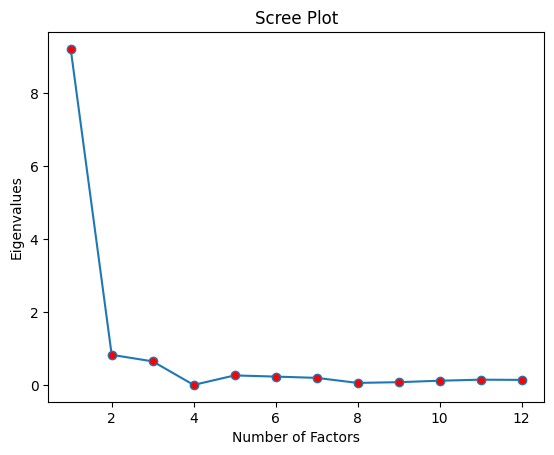

In [45]:
# Scale the returns.
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns_df)

# Calculate the eigenvalues of the correlation matrix.
eigenvalues, eigenvectors = np.linalg.eig(returns_df.corr())

# Plot the eigenvalues.
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', markerfacecolor='red')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalues')
plt.show()

As seen above, the number of factors where the eigenvalues start to level off is at approximately **2 factors.**

##### Step 3: Factor Loadings for 'VDE'

In [46]:
num_of_factors = 2
fa = FactorAnalysis(n_components=num_of_factors)
factor_data = fa.fit_transform(scaled_returns)

# Extract factor loadings.
loadings = pd.DataFrame(fa.components_, columns=returns_df.columns).T

# Display loadings for VDE.
print(loadings.loc['VDE'])

0   -0.73071
1    0.39718
Name: VDE, dtype: float64


Above are the factor loadings for VDE which explain how much variance in VDE (Energy Sector) is explained by the underlying factors. 

For **Factor 0**, the loading is $-0.73071$ which suggests that there is a significant negative relationship between VDE and this latent factor. 

If we assume that Factor 0 represents the overall market (which is common for most factor analysis), then the Energy sector has an inverse relationship with the overall market, implying that during the period from 2017 to 2020, the Energy sector was moving opposite to the overall market. This is important since it could be a potential hedge against broader market downturns. However, this is only if Factor 0 represents the SPY. Otherwise, we can only say that VDE has a significant negative relationship with this latent factor.

For **Factor 1**, the loading is $0.39718$, which indicates a moderate positive relationship between VDE and this latent factor. This means that VDE tends to move in the same direction as this factor.

#### Problem #2

Now use data from January 01, 2017 to December 31, 2020 to build a portfolio with all 20 stocks through minimizing the return variance with a targeted return of 0.03. Assume that the portfolio weights add up to 1, allowing for short sales. Test the portfolio performance during the first 6 months of 2021 (01/01/2021 to 06/30/2021) and compare the performance of the portfolio’s daily return with the S&P 500 index daily return using Sharpe ratio. (15 points)

##### Step 1: Data Loading & Preprocessing

In [50]:
# Load the dataset.
data = pd.read_csv('SP20-2017-2021_Updated.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Compute daily returns for 20 stocks.
daily_returns = data.pct_change().dropna()

print(daily_returns.head())

                 CHK       AMD       LNT       FCX      VRTX       WMB   
Date                                                                     
2021-02-11 -0.048678  0.003357 -0.008347 -0.008003 -0.009552 -0.023235  \
2021-02-12 -0.006776  0.011979 -0.008622  0.007744  0.016532  0.025135   
2021-02-16  0.024465 -0.024635 -0.009733  0.053474 -0.017338  0.003065   
2021-02-17  0.016303 -0.016619  0.008574  0.037994  0.021782  0.007857   
2021-02-18 -0.028468 -0.014454  0.007879 -0.000293 -0.023365 -0.035946   

                INCY      NFLX       MRO        MU       MCD     BRK-B   
Date                                                                     
2021-02-11 -0.002113 -0.010646 -0.037404  0.050152 -0.000606 -0.000667  \
2021-02-12 -0.007766 -0.001919  0.025143  0.017692 -0.001727  0.011261   
2021-02-16 -0.026088  0.001366  0.068233 -0.003068  0.005283  0.011631   
2021-02-17  0.019968 -0.010659  0.003141 -0.019261 -0.007348 -0.000122   
2021-02-18 -0.026501 -0.005659 -0.048

##### Step 2: Portfolio Construction

In [51]:
import cvxpy as cp

# Set the target return.
target_return = 0.03

# Calculate expected returns and the covariance matrix for the 20 stocks.
expected_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

print(expected_returns)
print(cov_matrix)

# Convert expected returns and covariance matrix to numpy arrays.
expected_returns_np = expected_returns.values
cov_matrix_np = cov_matrix.values

# Set up the optimization problem.
weights = cp.Variable(len(expected_returns_np))
objective = cp.Minimize(cp.quad_form(weights, cov_matrix_np))

# Adjust this line to work with numpy arrays
constraints = [cp.sum(weights) == 1, cp.sum(expected_returns_np @ weights) >= target_return]

# Solve the optimization problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Extract the optimal weights
optimal_weights = weights.value

print(optimal_weights)
print(sum(optimal_weights))

CHK      0.002386
AMD      0.002375
LNT      0.000917
FCX      0.001451
VRTX    -0.000395
WMB      0.001551
INCY    -0.001050
NFLX     0.000915
MRO      0.004032
MU      -0.000368
MCD      0.001082
BRK-B    0.001020
SO       0.000403
T       -0.000310
KO       0.000878
PG       0.000829
JNJ      0.000002
WM       0.001943
RSG      0.002185
PEP      0.001143
dtype: float64
                CHK       AMD           LNT       FCX      VRTX       WMB   
CHK    4.983586e-04  0.000072 -6.687807e-06  0.000280 -0.000011  0.000156  \
AMD    7.203623e-05  0.000584 -4.733619e-05  0.000198  0.000067  0.000020   
LNT   -6.687807e-06 -0.000047  1.278052e-04 -0.000067  0.000019  0.000016   
FCX    2.802714e-04  0.000198 -6.672365e-05  0.001016  0.000030  0.000212   
VRTX  -1.138651e-05  0.000067  1.872131e-05  0.000030  0.000220  0.000020   
WMB    1.558451e-04  0.000020  1.564589e-05  0.000212  0.000020  0.000194   
INCY   4.891064e-05  0.000106  8.766925e-06  0.000022  0.000129  0.000026   
NFLX  -1.

##### Step 3: Performance Testing

In [57]:
# Portfolio's daily returns for the first half of 2021
portfolio_returns_2021 = daily_returns.loc['2021-01-01':'2021-06-30'] @ optimal_weights

print(portfolio_returns_2021)

# Fetch the S&P 500 data for the first half of 2021
sp500_2021 = yf.download('^GSPC', start='2021-01-01', end='2021-06-30')

# Calculate daily returns.
sp500_2021_returns = sp500_2021['Close'].pct_change().dropna()

combined_returns = pd.concat([portfolio_returns_2021, sp500_2021_returns], axis=1, join='inner')
combined_returns.columns = ['Portfolio', 'S&P 500']

print(combined_returns)

# Assume risk-free rate is 0%.
risk_free_rate = 0.00

# Compute mean daily returns.
mean_return_portfolio = combined_returns['Portfolio'].mean()
mean_return_sp500 = combined_returns['S&P 500'].mean()

# Calculate standard deviation of daily returns.
std_dev_portfolio = combined_returns['Portfolio'].std()
std_dev_sp500 = combined_returns['S&P 500'].std()

# Compute Sharpe Ratios.
sharpe_ratio_portfolio = (mean_return_portfolio - risk_free_rate) / std_dev_portfolio
sharpe_ratio_sp500 = (mean_return_sp500 - risk_free_rate) / std_dev_sp500

# Display results.
print(f"Mean Daily Return (Portfolio): {mean_return_portfolio:.6f}")
print(f"Mean Daily Return (S&P 500): {mean_return_sp500:.6f}")
print(f"Standard Deviation (Portfolio): {std_dev_portfolio:.6f}")
print(f"Standard Deviation (S&P 500): {std_dev_sp500:.6f}")
print(f"Sharpe Ratio (Portfolio): {sharpe_ratio_portfolio:.6f}")
print(f"Sharpe Ratio (S&P 500): {sharpe_ratio_sp500:.6f}")

Date
2021-02-11   -0.150774
2021-02-12   -0.076386
2021-02-16    0.106231
2021-02-17   -0.136027
2021-02-18    0.102646
                ...   
2021-06-24    0.010212
2021-06-25   -0.029183
2021-06-28   -0.053585
2021-06-29    0.088756
2021-06-30    0.110217
Length: 97, dtype: float64
[*********************100%***********************]  1 of 1 completed
            Portfolio   S&P 500
Date                           
2021-02-11  -0.150774  0.001662
2021-02-12  -0.076386  0.004711
2021-02-16   0.106231 -0.000569
2021-02-17  -0.136027 -0.000320
2021-02-18   0.102646 -0.004416
...               ...       ...
2021-06-23  -0.057175 -0.001083
2021-06-24   0.010212  0.005811
2021-06-25  -0.029183  0.003331
2021-06-28  -0.053585  0.002315
2021-06-29   0.088756  0.000277

[96 rows x 2 columns]
Mean Daily Return (Portfolio): 0.020864
Mean Daily Return (S&P 500): 0.001005
Standard Deviation (Portfolio): 0.079126
Standard Deviation (S&P 500): 0.008207
Sharpe Ratio (Portfolio): 0.263687
Sharpe Ratio (

The Sharpe ratio provides a measure of risk-adjusted performance. In this case, despite the higher volatility of the portfolio, its Sharpe ratio is higher than that of the S&P 500. A higher Sharpe ratio indicates that, on a risk-adjusted basis, the portfolio outperformed the S&P 500 during the first half of 2021.

#### Problem #3

Consider the client’s concern with the ENERGY sector (including stocks such as CHK, LNT, WMB, and MRO), please rebuild the portfolio that would eliminate the client’s exposure to energy sector? Test the updated portfolio during the first 6 months of 2021 (01/01/2021 to 06/30/2021) and compare the performance of the portfolio’s daily return with the previous portfolio using Sharpe ratio. (15 points)

##### Step 1: Portfolio Construction

In [66]:
# Remove stocks in energy sector.
energy_stocks = ['CHK', 'LNT', 'WMB', 'MRO']
stocks_without_energy = [stock for stock in stock_symbols if stock not in energy_stocks]

# Extracting daily returns for stocks without energy sector
daily_returns_without_energy = daily_returns[stocks_without_energy]

print(daily_returns_without_energy)

# Calculate expected returns and covariance matrix for the remaining stocks
expected_returns_without_energy = daily_returns_without_energy.mean().values  # Convert to numpy array
cov_matrix_without_energy = daily_returns_without_energy.cov().values  # Convert to numpy array

# Set up the optimization problem
weights_without_energy = cp.Variable(len(expected_returns_without_energy))
objective_without_energy = cp.Minimize(cp.quad_form(weights_without_energy, cov_matrix_without_energy))
constraints_without_energy = [cp.sum(weights_without_energy) == 1, expected_returns_without_energy.T @ weights_without_energy >= target_return]

# Solve the optimization problem
prob_without_energy = cp.Problem(objective_without_energy, constraints_without_energy)
prob_without_energy.solve()

# Extract the optimal weights for the stocks excluding the energy sector
optimal_weights_without_energy = weights_without_energy.value

print(optimal_weights_without_energy)
print(sum(optimal_weights_without_energy))

                 AMD       FCX      VRTX      INCY      NFLX        MU   
Date                                                                     
2021-02-11  0.003357 -0.008003 -0.009552 -0.002113 -0.010646  0.050152  \
2021-02-12  0.011979  0.007744  0.016532 -0.007766 -0.001919  0.017692   
2021-02-16 -0.024635  0.053474 -0.017338 -0.026088  0.001366 -0.003068   
2021-02-17 -0.016619  0.037994  0.021782  0.019968 -0.010659 -0.019261   
2021-02-18 -0.014454 -0.000293 -0.023365 -0.026501 -0.005659  0.028937   
...              ...       ...       ...       ...       ...       ...   
2021-11-01  0.041587  0.016172  0.002542  0.035384 -0.013240  0.023155   
2021-11-02  0.019165  0.005740 -0.021575 -0.084643 -0.005065  0.000849   
2021-11-03  0.022722 -0.008301  0.042282  0.052142  0.015596  0.006925   
2021-11-04  0.053398 -0.032174  0.027186  0.010481 -0.028898  0.013895   
2021-11-05 -0.008436  0.001757 -0.004634  0.008149 -0.024312  0.007967   

                 MCD     BRK-B       